# 逻辑回归

逻辑回归本名应叫做对数几率回归，是线性回归的一种推广。

通过sigmoid函数，将线性值映射为一个2分类的0/1值。

除了长的很优雅之外，sigmoid 函数还有一个很好的特性就是其求导计算等于下式，这给我们后续求交叉熵损失的梯度时提供了很大便利。

sigmoid函数图像：
![](./imgs/2_3.png)

![](./imgs/2_1.png)

![](./imgs/2_2.png)

## 逻辑回归的python实现
- sigmoid函数
- 模型主体
- 参数初始化
- 基于梯度下降的参数更新训练
- 数据测试与可视化展示

In [3]:
import numpy as np

In [2]:
"""
定义sigmoid函数
"""
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [4]:
"""
定义模型参数初始化函数
"""
def initialize_params(dims):
    W=np.zeros((dims,1))  # W.shape=[特征数,1]
    b=0
    return W,b

In [22]:
"""
定义逻辑回归模型主体部分
- 模型计算公式
- 损失函数
- 参数的梯度公式

np.dot(x,y)
- 当x,y均为列表时，表示向量点积
- 当x,y为矩阵时，表示矩阵乘法

np.sum()
- 无参数时，表示把数组或者矩阵所有元素求和
- -1：按倒数第一个axis求和
"""

def logistic(X,y,W,b):
    num_train=X.shape[0]  # 样本数
    num_feature=X.shape[1]  # 特征数

    a=sigmoid(np.dot(X,W)+b)
    cost=-1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a))

    dw=np.dot(X.T,(a-y))/num_train
    db=np.sum(a-y)/num_train
    cost=np.squeeze(cost)  #  Remove axes of length one from `cost`.(降为1维)

    return a,cost,dw,db



In [6]:
"""
定义基于梯度下降的参数更新训练过程
"""

def logistic_train(X,y,learning_rate,epochs):
    # 初始化模型参数
    W,b=initialize_params(X.shape[1])
    cost_list=[]

    # 迭代训练
    for i in range(epochs):

        # 计算当前次的模型计算结果，损失和参数梯度
        a,cost,dW,db=logistic(X,y,W,b)

        # 参数更新
        W=W-learning_rate*dW
        b=b-learning_rate*db

        # 记录损失
        if i%100 == 0:
            cost_list.append(cost)

        # 打印训练过程中的损失
        if i %100 ==0:
            print(f'epoch:{i}, cost:{cost}')

    # 保存参数
    params={'W':W,'b':b}

    # 保存梯度
    grads={'dW':dW,'db':db}

    return cost_list,params,grads



In [7]:
"""
定义对测试数据的预测函数
"""

def predict(X,params):
    y_prediction=sigmoid(np.dot(X,params['W'])+params['b'])
    for i in range(len(y_prediction)):
        if y_prediction[i]>0.5:
            y_prediction[i]=1
        else:
            y_prediction[i]=0
    return y_prediction


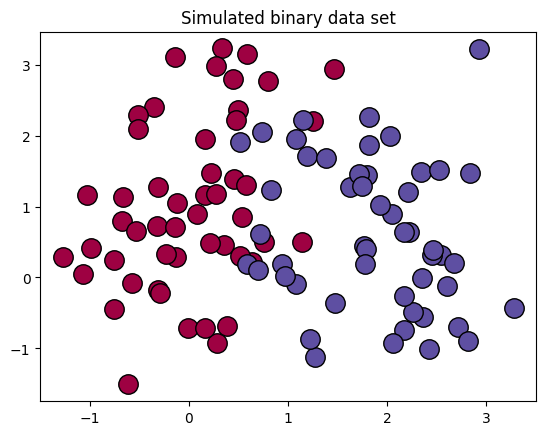

In [19]:
"""
使用sklearn生成模拟的二分类数据集进行模型训练和测试
"""

import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_classification

X,labels=make_classification(n_samples=100,
                             n_features=2,
                             n_redundant=0,
                             n_informative=2,
                             random_state=1,
                             n_clusters_per_class=2)
# 设置随机数种子
rng=np.random.RandomState(2)

# 对生成的特征数据添加一组均匀分布噪声
X += 2 * rng.uniform(size=X.shape)


# 标签类别数
unique_lables = set(labels)
# 根据标签类别数设置颜色
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_lables)))
# 绘制模拟数据的散点图
for k,col in zip(unique_lables, colors):
    x_k=X[labels==k]
    plt.plot(x_k[:,0],
             x_k[:,1],
             'o',
             markerfacecolor=col,markeredgecolor="k",
             markersize=14)
plt.title('Simulated binary data set')
plt.show()


In [20]:
"""
划分训练集与测试集
"""

offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [23]:
# 对训练集进行训练
cost_list,params,grads=logistic_train(X_train,y_train,learning_rate=0.01,epochs=1000)

epoch:0, cost:0.6931471805599454
epoch:100, cost:0.5540662174971359
epoch:200, cost:0.4809534179716419
epoch:300, cost:0.4347382724416333
epoch:400, cost:0.402394972323804
epoch:500, cost:0.37827463468485373
epoch:600, cost:0.3594684731533692
epoch:700, cost:0.34431259320420504
epoch:800, cost:0.3317834844725561
epoch:900, cost:0.3212157122954609


In [24]:
"""
对测试集数据进行预测
"""
y_prediction=predict(X_test,params)
y_prediction

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [25]:
y_test

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [27]:
"""
定义一个分类准确率函数对训练集和测试集的准确率进行评估
"""
def accuracy(y_test,y_pred):
    correct_count=0
    for i in range(len(y_test)):
        for j in range(len(y_pred)):
            if y_test[i]==y_pred[j] and i==j:  # 预测正确
                correct_count=correct_count+1
    accuracy_score=correct_count/len(y_test)
    return accuracy_score


In [29]:
y_train_pred=predict(X_train,params)
# 打印训练准确率
accuracy_score_train=accuracy(y_train,y_train_pred)
accuracy_score_train

0.8888888888888888

In [30]:
# 打印测试准确率
accuracy_score_test = accuracy(y_test, y_prediction)
accuracy_score_test

1.0

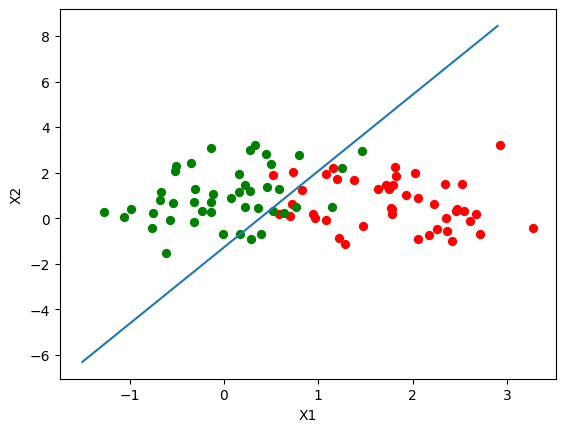

In [31]:
"""
定义绘制模型决策边界的图形函数对训练结果进行可视化展示
"""

def plot_logistic(X_train,y_train,params):
    n=X_train.shape[0]

    # 初始化类别坐标点列表
    xcord1=[]
    ycord1=[]
    xcord2=[]
    ycord2=[]

    # 获取两类坐标点(属性值)并存入列表
    for i in range(n):
        if y_train[i]==1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])

    fig=plt.figure()
    ax=fig.add_subplot(111)

    # 绘制两类散点，以不同颜色表示
    ax.scatter(xcord1,ycord1,s=32,c='red')
    ax.scatter(xcord2,ycord2,s=32,c='green')

    # 取值范围
    x=np.arange(-1.5,3,0.1)
    # 决策边界公式
    y=(-params['b']-params['W'][0]*x)/params['W'][1]
    # 绘图
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


plot_logistic(X_train,y_train,params)
